# **DAV LEVEL 1** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load GHG Emission data
ghgEmission = "drive/My Drive/Study/DAV/co2_data.csv"
northHemIce = "drive/My Drive/Study/DAV/north_hemisphere_ice.xlsx"
southHemIce = "drive/My Drive/Study/DAV/south_hemishpere_ice.xlsx"
df_ghg = pd.read_csv(ghgEmission)
df_northHemIce = pd.read_excel(northHemIce)
df_southHemIce = pd.read_excel(southHemIce)
# display(df_ghg)

# Set max_rows and max_columns options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [5]:
# Select a range of years (2010 to 2015)
start_year = 1990
end_year = 2021
selected_rows = df_ghg.loc[(df_ghg['year'] >= start_year) & (df_ghg['year'] <= end_year)]

In [6]:
#value to be removed as country
values_to_remove = ['Africa (GCP)','Aland Islands','American Samoa','Asia (GCP)','Asia (excl. China and India)', 'Central America (GCP)','Europe (GCP)', 'European Union (27) (GCP)', 'Falkland Islands', 'Guernsey', 'Isle of Man', 'Jersey',
'Middle East (GCP)', 'Netherlands Antilles', 'Non-OECD (GCP)', 'OECD (GCP)', 'Oceania (GCP)','Puerto Rico','Saint Martin (French part)', 'South America (GCP)','Svalbard and Jan Mayen','United States Virgin Islands','Western Sahara','World','Europe' 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'European Union (27)',
 'European Union (28)',
 'North America',
 'North America (GCP)',
 'North America (excl. USA)',
 'South America',
 'Upper-middle-income countries',
 'International transport',
 'High-income countries',
 'Asia',
 'Low-income countries',
 'Lower-middle-income countries',
 'Africa',
 'Europe',
 'Europe (excl. EU-27)',]

# Filter the DataFrame to remove rows that match the values in the array
df_filteredCountry = selected_rows[~selected_rows['country'].isin(values_to_remove)]

# Write the filtered DataFrame back to the CSV file
# display(df_filteredCountry)
# df_filteredCountry.to_csv('newData.csv', index=False)

In [7]:
# Define columns to keep
columns_to_keep = ['country', 'year','population','cement_co2','cement_co2_per_capita','co2','co2_per_capita','coal_co2','coal_co2_per_capita','flaring_co2','flaring_co2_per_capita','gas_co2','gas_co2_per_capita','land_use_change_co2','land_use_change_co2_per_capita','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita','oil_co2','oil_co2_per_capita','total_ghg']

# Keep only specified columns in the DataFrame
df_final = df_filteredCountry[columns_to_keep]

# display(df_final)

In [8]:
missing_percentages = df_final.isnull().sum() / len(df_final) * 100
display(missing_percentages)

country                            0.000000
year                               0.000000
population                         0.269848
cement_co2                         2.698480
cement_co2_per_capita              2.968328
co2                                0.255646
co2_per_capita                     0.525494
coal_co2                           0.298253
coal_co2_per_capita                0.568101
flaring_co2                        0.298253
flaring_co2_per_capita             0.568101
gas_co2                            0.298253
gas_co2_per_capita                 0.568101
land_use_change_co2                8.649340
land_use_change_co2_per_capita     8.649340
methane                           17.341287
methane_per_capita                17.341287
nitrous_oxide                     17.341287
nitrous_oxide_per_capita          17.341287
oil_co2                            0.298253
oil_co2_per_capita                 0.568101
total_ghg                         17.355489
dtype: float64

In [9]:
df_greeenHouseGas = df_final.copy()

# #Total use of GHG in a year
# df_greeenHouseGas['total_ghg'] = df_greeenHouseGas['co2'] + df_greeenHouseGas['methane'] + df_greeenHouseGas['nitrous_oxide']

column_name = 'country'
num_unique_country = df_greeenHouseGas[column_name].unique()
num_unique_values_count = df_greeenHouseGas[column_name].nunique()

unique_values_country_list = num_unique_country.tolist()

# Print the result
# print(f'The number of unique values in {column_name} is {num_unique_values_count}.')
# display(unique_values_list)

In [10]:
#Mean according to country for imputation of data
mean_accor_country = {}

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year[column_name] = mean
  
  mean_accor_country[country] = mean_accor_year


In [11]:
display(mean_accor_country['Afghanistan'])

{'year': 2005.5,
 'population': 24929732.28125,
 'cement_co2': 0.032093750000000004,
 'cement_co2_per_capita': 0.0015,
 'co2': 5.0441875,
 'co2_per_capita': 0.1759375,
 'coal_co2': 1.45146875,
 'coal_co2_per_capita': 0.04478125,
 'flaring_co2': 0.0085,
 'flaring_co2_per_capita': 0.0005,
 'gas_co2': 0.30800000000000005,
 'gas_co2_per_capita': 0.01471875,
 'land_use_change_co2': 0.632125,
 'land_use_change_co2_per_capita': 0.020968750000000005,
 'methane': 11.642333333333335,
 'methane_per_capita': 0.4971,
 'nitrous_oxide': 3.8856666666666664,
 'nitrous_oxide_per_capita': 0.1721,
 'oil_co2': 3.2443125000000004,
 'oil_co2_per_capita': 0.11434375000000001,
 'total_ghg': 18.11466666666667}

In [12]:
# Loop through the rows and columns and replace null values with Average value per country 
for i, row in df_greeenHouseGas.iterrows():
    country = row['country']  
    for column_name in df_greeenHouseGas.columns:
        if pd.isnull(row[column_name]):
            replacement_value = mean_accor_country[country][column_name];
            # print(replacement_value)
            if np.isnan(replacement_value) :
              df_greeenHouseGas.at[i, column_name] = 0.0
            else:
              df_greeenHouseGas.at[i, column_name] = mean_accor_country[country][column_name]

missing_percentages = df_greeenHouseGas.isna().sum() 
# display(missing_percentages)

In [13]:
#check
afgan = df_greeenHouseGas.loc[(df_greeenHouseGas['year'] == 2020) & (df_greeenHouseGas['country'] == 'Afghanistan')]
display(afgan)
# null_rows.groupby('country').apply(display)
# gb = null_rows.groupby("country")
# print(gb.count())
# null_rows.describe()

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,total_ghg
170,Afghanistan,2020,38972236.0,0.061,0.002,11.682,0.3,4.15,0.106,0.0,0.0,0.251,0.006,0.33,0.008,11.642333,0.4971,3.885667,0.1721,7.22,0.185,18.114667


In [14]:
# Shape of the dataframe
rows, cols = df_greeenHouseGas.shape

# Number of rows and columns
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 7041
Number of columns: 22


In [15]:
#After Imputation
missing_percentages = df_greeenHouseGas.isnull().sum() / len(df_final) * 100
display(missing_percentages)

country                           0.0
year                              0.0
population                        0.0
cement_co2                        0.0
cement_co2_per_capita             0.0
co2                               0.0
co2_per_capita                    0.0
coal_co2                          0.0
coal_co2_per_capita               0.0
flaring_co2                       0.0
flaring_co2_per_capita            0.0
gas_co2                           0.0
gas_co2_per_capita                0.0
land_use_change_co2               0.0
land_use_change_co2_per_capita    0.0
methane                           0.0
methane_per_capita                0.0
nitrous_oxide                     0.0
nitrous_oxide_per_capita          0.0
oil_co2                           0.0
oil_co2_per_capita                0.0
total_ghg                         0.0
dtype: float64

In [16]:
#Mean according to country in the last 3 decade

mean_accor_country_Array = []

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year_Obj = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year_Obj[column_name] = mean
    mean_accor_year_Obj['country'] = countryName

  mean_accor_country_Array.append(mean_accor_year_Obj)

  # mean_accor_country[country] = mean_accor_year

Total Number of countries in the dataset:  222
Average emission of CO2 per country should be: 62.04 Million ton


Text(0.5, 1.0, 'co2 emission per year')

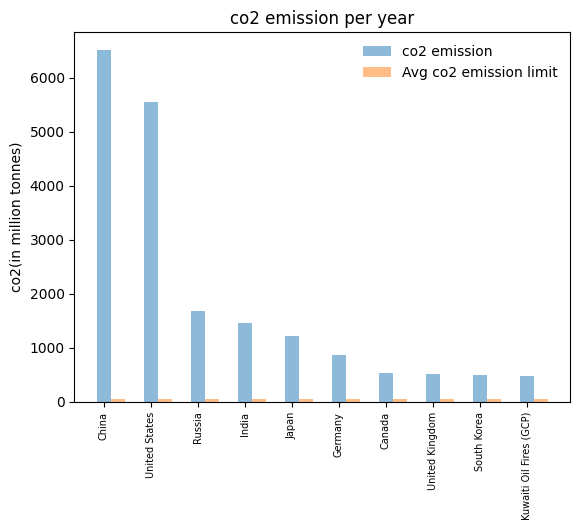

In [ ]:
#co2_graph for top 10 country

# sorted_list_by_co2 according to mean of that country
sorted_list_by_co2 = sorted(mean_accor_country_Array, key=lambda x: x['co2'], reverse=True)[:10]

#count country
country_count = len(mean_accor_country_Array)
print("Total Number of countries in the dataset: ",country_count)

#The IPCC report suggests that to have at least a 50 per cent chance of keeping to less than 2°C of warming, mankind must emit no more than 1212 giga ton
# from 2012 to rest of the century

#convert 1212 giga ton to million ton to match the data set and find average for every country
co2_limit_per_country = 1212000/(country_count*(2100-2012))
print("Average emission of CO2 per country should be: "+ str(round(co2_limit_per_country, 2))+" Million ton")

x_axis_countries_name = []
y_axis_mean_value = []
y_axis_average_co2_value = []

for meanValues in sorted_list_by_co2:
    x_axis_countries_name.append(meanValues['country'])
    y_axis_average_co2_value.append(co2_limit_per_country)
    y_axis_mean_value.append(meanValues["co2"])

bar_width=.3
y_pos = np.arange(len(x_axis_countries_name))


plt.bar(y_pos,y_axis_mean_value, align='center', alpha=0.5, width =bar_width ,label = 'co2 emission')
plt.bar(y_pos+bar_width,y_axis_average_co2_value, align='center', alpha=0.5, width =bar_width,label='Avg co2 emission limit')

plt.legend(loc='upper right', frameon=False)

plt.xticks(fontsize=7)
plt.xticks(y_pos,x_axis_countries_name, rotation='vertical')
plt.ylabel('co2(in million tonnes)')
plt.title("co2 emission per year")


In [ ]:
#https://www.airclim.org/how-much-more-can-be-emitted
#https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_SPM_FINAL.pdf


Text(0.5, 1.0, 'co2 emission per capita in a year')

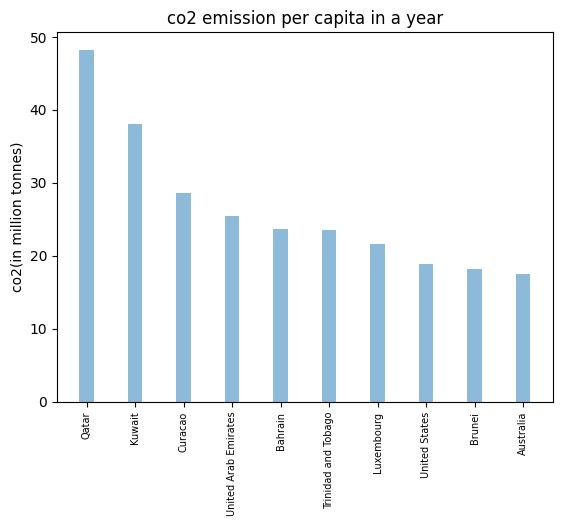

In [ ]:
# Graph total use of Co2 in a year
#Dataset are cleaned before and now only taking the variable 

sorted_list_by_co2_per_capita = sorted(mean_accor_country_Array, key=lambda x: x['co2_per_capita'], reverse=True)[:10]
# print(sorted_list_by_co2_per_capita)

x_axis_countries_name = []
y_axis_mean_value = []

for meanValues in sorted_list_by_co2_per_capita:
    x_axis_countries_name.append(meanValues['country'])
    y_axis_mean_value.append(meanValues["co2_per_capita"])


y_pos = np.arange(len(x_axis_countries_name))

plt.bar(y_pos,y_axis_mean_value, align='center', alpha=0.5, width =.3)
plt.xticks(fontsize=7)
plt.xticks(y_pos,x_axis_countries_name, rotation='vertical')
plt.ylabel('co2(in million tonnes)')
plt.title("co2 emission per capita in a year")

Text(0.5, 1.0, 'total GHG gas per year ')

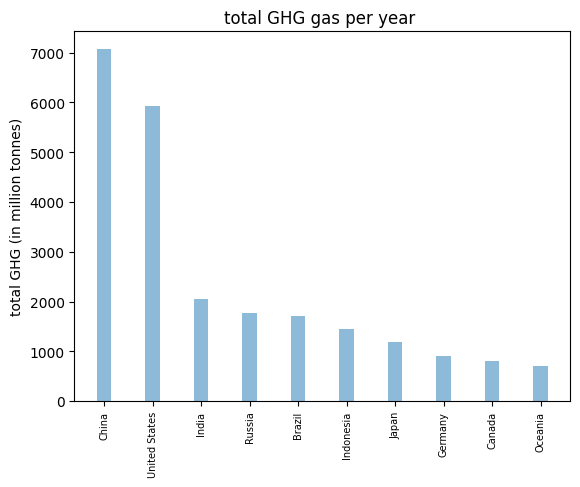

In [ ]:
# Graph total use of Co2 in a year

sorted_list_by_total_ghg = sorted(mean_accor_country_Array, key=lambda x: x['total_ghg'], reverse=True)[:10]
# print(sorted_list_by_total_ghg)

x_axis_countries_name = []
y_axis_mean_value = []

for meanValues in sorted_list_by_total_ghg:
    x_axis_countries_name.append(meanValues['country'])
    y_axis_mean_value.append(meanValues["total_ghg"])


y_pos = np.arange(len(x_axis_countries_name))

plt.bar(y_pos,y_axis_mean_value, align='center', alpha=0.5, width =.3)
plt.xticks(fontsize=7)
plt.xticks(y_pos,x_axis_countries_name, rotation='vertical')
plt.ylabel('total GHG (in million tonnes)')
plt.title("total GHG gas per year ")


In [ ]:
top_10_country_for_ghg = []
for index in sorted_list_by_total_ghg:
  top_10_country_for_ghg.append(index['country'])

display(top_10_country_for_ghg)


['China',
 'United States',
 'India',
 'Russia',
 'Brazil',
 'Indonesia',
 'Japan',
 'Germany',
 'Canada',
 'Oceania']

In [ ]:
#take china to show the descriptive analysis
df_china = df_greeenHouseGas[df_greeenHouseGas['country'] == 'China']

descriptiveAnalysisofChina = df_china.describe()

display(descriptiveAnalysisofChina)

descriptiveAnalysisofChina.to_csv('chinaDescriptiveAnalysis.csv', index=False)

,year,population,cement_co2,cement_co2_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,total_ghg
count,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005.500000,1.307463e+09,463.018156,0.343250,6513.532969,4.858562,4808.551812,3.59100,1.183625,0.000875,209.944187,0.152500,560.976750,0.44725,946.324667,0.724367,430.099667,0.328267,911.714125,0.680969,7074.232000
std,9.380832,8.227590e+07,265.755567,0.182297,3142.035494,2.100468,2250.707277,1.50599,1.820694,0.001362,218.980660,0.152611,386.538195,0.33050,146.852991,0.073639,83.136795,0.045171,412.991451,0.271551,3204.934353
min,1990.000000,1.153704e+09,84.513000,0.073000,2484.855000,2.154000,1976.684000,1.71300,0.000000,0.000000,29.301000,0.025000,8.427000,0.00600,765.840000,0.621000,296.170000,0.252000,330.291000,0.286000,2891.730000
25%,1997.750000,1.244577e+09,209.245250,0.168500,3508.435250,2.834500,2596.550750,2.06850,0.000000,0.000000,48.993250,0.039750,287.322000,0.20175,812.325000,0.660750,373.442500,0.296250,558.936750,0.450500,4016.962500
50%,2005.500000,1.308987e+09,440.868000,0.336500,6182.679500,4.722500,4664.882000,3.56350,0.000000,0.000000,94.355000,0.072000,417.916000,0.30950,924.850000,0.709000,428.854833,0.328133,874.353500,0.668000,7004.541000
75%,2013.250000,1.378373e+09,727.257250,0.524750,9801.186750,7.084750,7277.680750,5.17575,3.118500,0.002000,332.650750,0.241500,1011.731500,0.83375,1120.627500,0.799750,500.547500,0.368500,1239.867750,0.899250,10460.275000
max,2021.000000,1.425894e+09,858.233000,0.602000,11472.368000,8.046000,7955.985000,5.58000,5.119000,0.004000,773.866000,0.543000,1322.667000,1.14600,1176.340000,0.838000,552.670000,0.394000,1713.340000,1.202000,12055.410000


In [ ]:
#take Oceania  to show the descriptive analysis
df_oceania = df_greeenHouseGas[df_greeenHouseGas['country'] == 'Oceania']

descriptiveAnalysisofOcenia = df_oceania.describe()

display(descriptiveAnalysisofOcenia)
descriptiveAnalysisofOcenia.to_csv('oceaniaDescriptiveAnalysis.csv', index=False)

,year,population,cement_co2,cement_co2_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,total_ghg
count,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005.500000,3.479677e+07,3.929344,0.116906,409.812344,11.926031,183.944625,5.421906,10.225812,0.289563,65.269312,1.864031,148.737750,4.386063,181.97200,5.439700,98.238000,2.944300,142.248375,4.111375,712.560333
std,9.380832,5.459170e+06,0.379527,0.022337,53.572216,0.770652,20.870028,0.820367,3.873713,0.065078,16.032811,0.183007,113.270702,3.330888,13.25646,0.865597,14.215323,0.616235,23.999391,0.135619,52.385208
min,1990.000000,2.674421e+07,3.229000,0.073000,309.475000,10.017000,147.035000,3.624000,7.401000,0.233000,40.887000,1.515000,-18.650000,-0.691000,156.81000,4.009000,72.950000,1.882000,105.672000,3.865000,629.510000
25%,1997.750000,3.018633e+07,3.658250,0.099750,367.875750,11.439500,165.393500,4.690000,7.729250,0.252250,51.455500,1.719500,64.376500,1.865500,177.03750,4.580750,90.700000,2.368250,120.751000,4.019750,675.622500
50%,2005.500000,3.410462e+07,3.987500,0.128000,436.926500,11.926500,183.953500,5.617500,8.570000,0.263500,62.988500,1.905500,119.739500,3.361000,180.98500,5.439700,96.730000,3.059500,144.935000,4.126000,712.560333
75%,2013.250000,3.922567e+07,4.140000,0.131500,452.223500,12.605000,200.104000,6.099250,10.289000,0.287500,78.958750,2.005000,209.260000,6.779500,186.97750,6.331500,100.575000,3.401250,166.469000,4.241000,752.225000
max,2021.000000,4.449206e+07,4.706000,0.150000,470.359000,12.998000,213.906000,6.391000,21.176000,0.492000,93.151000,2.132000,551.652000,14.972000,208.82000,6.692000,128.940000,4.066000,177.541000,4.308000,810.360000


In [ ]:
#Ice area in 2 hemispheres

df_totalIceArea = pd.concat([df_northHemIce['year'],df_northHemIce['Annual'].rename("north_hemisphere_ice")  , df_southHemIce['Annual'].rename("south_hemisphere_ice")], axis=1)
df_totalIceArea['total_ice'] = df_northHemIce['Annual']+df_southHemIce['Annual']

# display(df_totalIceArea) 
#Statistical Analysis of ice covered area
discriptiveAnalysisOfIceArea = df_totalIceArea[['north_hemisphere_ice','south_hemisphere_ice','total_ice']].describe()

display(discriptiveAnalysisOfIceArea) 
# discriptiveAnalysisOfIceArea.to_csv('iceAreaDescriptiveAnalysis.csv', index=False)

,north_hemisphere_ice,south_hemisphere_ice,total_ice
count,33.000000,33.000000,33.000000
mean,9.179424,11.657121,20.836545
std,0.475100,0.476877,0.726420
min,8.311000,10.647000,19.433000
25%,8.779000,11.410000,20.250000
50%,9.215000,11.687000,21.192000
75%,9.593000,11.961000,21.317000
max,10.086000,12.776000,21.861000


In [ ]:
# Shape of the dataframe
rows, cols = df_totalIceArea.shape

# Number of rows and columns
print("Number of rows in Total Ice Area Dataset:", rows)
print("Number of columns in Total Ice Area Dataset:", cols)

Number of rows in Total Ice Area Dataset: 33
Number of columns in Total Ice Area Dataset: 4


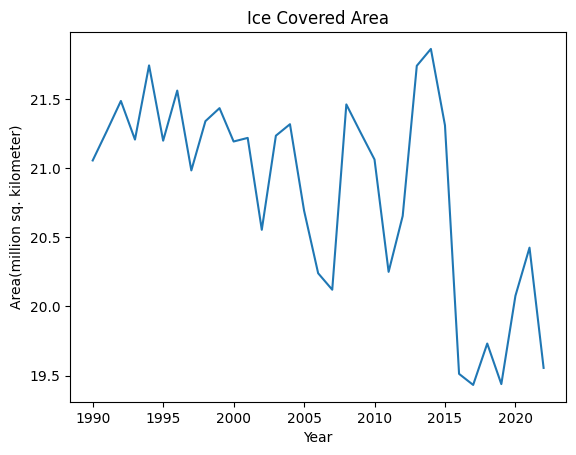

In [ ]:
#Graph of Annual data
#Take the vlues from dataset
years = np.array(df_totalIceArea["year"])
iceValues = np.array(df_totalIceArea['total_ice'])

fig, ax = plt.subplots()

ax.plot(years,iceValues )

plt.xlabel('Year')
plt.ylabel('Area(million sq. kilometer)')
plt.title('Ice Covered Area')
plt.show()